In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/UVic-Term2/CaptstoneProjectData_2025.csv'

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=932bc67bc39a0394fa2077be8f0666aedd1d556a5d0189da7e4ff5acda3e33bb
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import matplotlib.pyplot as plt
import re
from collections import Counter

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head(5)

,Subject,Body,Unnamed: 2,Unnamed: 3
0,®Review your shipment details / Shipment Notif...,Notice: This message was sent from outside the...,NaN,NaN
1,Υоur ассоunt іѕ оn hоld,\r\nVotre réponse a bien été prise en compte.\...,NaN,NaN
2,Completed: Invoice # KZ89TYS2564 from-Bestbuy....,Notice: This message was sent from outside the...,NaN,NaN
3,UVic IMPORTANT NOTICE!,Your UVIC account has been filed under the lis...,NaN,NaN
4,You have (6) Suspended incoming messages,\r\n\r\nMessage generated from uvic.ca source...,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject     2467 non-null   object 
 1   Body        2571 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
language_map = {
    'en': 'English',
    'fr': 'French',
    'nl': 'Dutch',
    'lv': 'Latvian',
    'tl': 'Tagalog',
    'pt': 'Portuguese',
    'es': 'Spanish',
    'ca': 'Catalan',
    'cy': 'Welsh',
    'it': 'Italian',
    'de': 'German',
    'id': 'Indonesian',
    'et': 'Estonian',
    'no': 'Norwegian',
    'sv': 'Swedish',
    'af': 'Afrikaans',
    'pl': 'Polish',
    'ro': 'Romanian',
    'da': 'Danish',
    'hu': 'Hungarian',
    'tr': 'Turkish',
    'unknown': 'Unknown'
}

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

In [ ]:
data['Language'] = data['Body'].astype(str).apply(detect_language)

In [ ]:
data['LanguageFull'] = data['Language'].map(language_map)

In [ ]:
print(data[['Subject', 'Language']].head())

                                             Subject Language
0  ®Review your shipment details / Shipment Notif...       en
1                            Υоur ассоunt іѕ оn hоld       et
2  Completed: Invoice # KZ89TYS2564 from-Bestbuy....       en
3                             UVic IMPORTANT NOTICE!       en
4          You have (6) Suspended incoming messages        en


In [ ]:
language_counts_full = data['LanguageFull'].value_counts()
print(language_counts_full)

LanguageFull
English       2484
Unknown         23
French          16
Dutch            8
Latvian          5
Tagalog          5
Portuguese       4
Spanish          4
Catalan          4
Welsh            4
Italian          3
German           3
Indonesian       2
Estonian         2
Norwegian        2
Swedish          1
Afrikaans        1
Polish           1
Romanian         1
Danish           1
Hungarian        1
Turkish          1
Name: count, dtype: int64


In [ ]:
def extract_urls(text):
    if not isinstance(text, str):
        return []
    url_pattern = r'(https?://[^\s]+)'
    return re.findall(url_pattern, text)

data['Extracted_URLs'] = data['Body'].apply(extract_urls)

In [ ]:
trusted_domains = ['uvic.ca']


def contains_external_link(urls):
    for url in urls:

        domain_match = re.search(r'https?://([^/]+)', url)
        if domain_match:
            domain = domain_match.group(1)
            if not any(td in domain for td in trusted_domains):
                return True
    return False

data['Has_External_Link'] = data['Extracted_URLs'].apply(contains_external_link)

In [ ]:
external_link_counts = data['Has_External_Link'].value_counts()
print(external_link_counts)

Has_External_Link
True     1318
False    1258
Name: count, dtype: int64


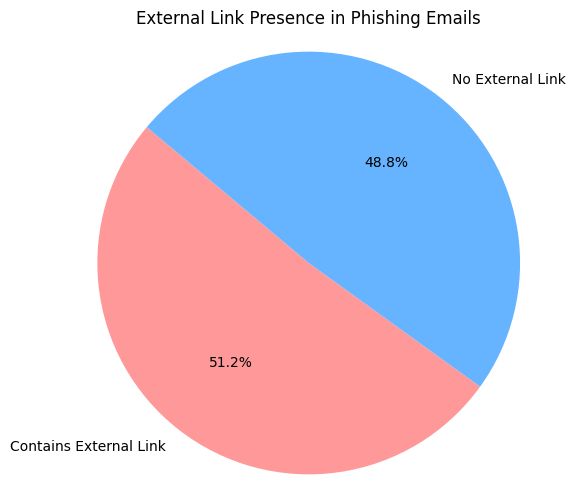

In [ ]:
external_link_counts = data['Has_External_Link'].value_counts()

labels = ['Contains External Link', 'No External Link']


colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(external_link_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('External Link Presence in Phishing Emails')
plt.axis('equal')
plt.show()

In [ ]:
# Extract all domain names
all_domains = []
for urls in data['Extracted_URLs']:
    for url in urls:
        match = re.search(r'https?://([^/]+)', url)
        if match:
            all_domains.append(match.group(1))

#the top 10 most frequently occurring domain names
domain_counts = Counter(all_domains)
top_domains = domain_counts.most_common(10)


df_top_domains = pd.DataFrame(top_domains, columns=['Domain', 'Count'])
display(df_top_domains)


,Domain,Count
0,www.ups.com,119
1,t.notifications.canadapost-postescanada.ca,95
2,s3.amazonaws.com,73
3,log.microsoftonline.com,65
4,static.cdn.responsys.net,60
5,firebasestorage.googleapis.com,51
6,www.uvic.ca>,50
7,c3acu228.caspio.com,39
8,bit.ly,28
9,link.petbnb.nl,26
